# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# print(city)

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | isangel
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | te anau
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | taungdwingyi
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | kyren
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | mae hong son
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | lac du bonnet
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | lavrentiya
Processing Record 21 of Set 1 | sinkat
City not found. Skipping...
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,279.21,70,20,6.69,CL,1674554803
1,hobart,-42.8794,147.3294,293.07,79,40,3.09,AU,1674554153
2,ribeira grande,38.5167,-28.7000,289.14,94,75,7.20,PT,1674554803
3,isangel,-19.5500,169.2667,300.37,85,99,2.60,VU,1674554804
4,ushuaia,-54.8000,-68.3000,278.26,87,8,3.92,AR,1674554804


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,279.21,70,20,6.69,CL,1674554803
1,hobart,-42.8794,147.3294,293.07,79,40,3.09,AU,1674554153
2,ribeira grande,38.5167,-28.7000,289.14,94,75,7.20,PT,1674554803
3,isangel,-19.5500,169.2667,300.37,85,99,2.60,VU,1674554804
4,ushuaia,-54.8000,-68.3000,278.26,87,8,3.92,AR,1674554804


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

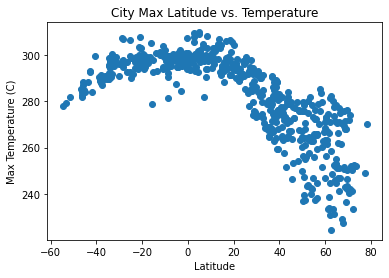

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

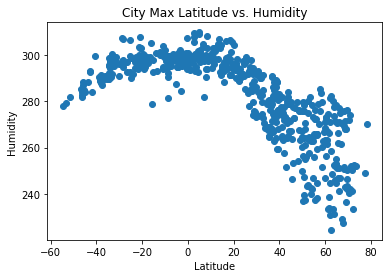

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Max Latitude vs. Humidity')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

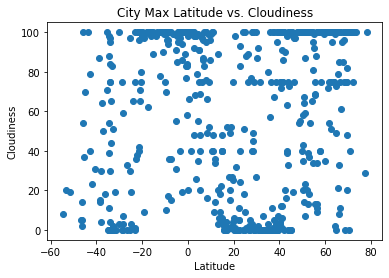

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Max Latitude vs. Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

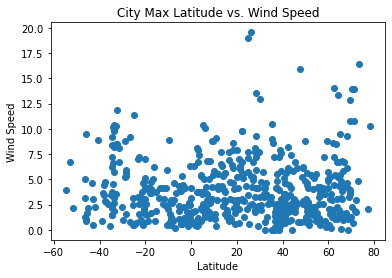

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Max Latitude vs. Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_heim_df = city_data_df[city_data_df['Lat'] >= 0 ]

# Display sample data
northern_heim_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ribeira grande,38.5167,-28.7000,289.14,94,75,7.20,PT,1674554803
7,taungdwingyi,20.0167,95.5500,304.61,15,6,2.96,MM,1674554804
8,lompoc,34.6391,-120.4579,279.03,93,0,3.09,US,1674554602
11,kyren,51.6828,102.1408,256.10,98,100,0.47,RU,1674554805
13,mae hong son,19.3003,97.9685,305.90,21,2,0.59,TH,1674554805


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_heim_df = city_data_df[city_data_df['Lat'] <= 0 ]

# Display sample data
southern_heim_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,279.21,70,20,6.69,CL,1674554803
1,hobart,-42.8794,147.3294,293.07,79,40,3.09,AU,1674554153
3,isangel,-19.5500,169.2667,300.37,85,99,2.60,VU,1674554804
4,ushuaia,-54.8000,-68.3000,278.26,87,8,3.92,AR,1674554804
5,te anau,-45.4167,167.7167,284.85,77,37,1.72,NZ,1674554804


###  Temperature vs. Latitude Linear Regression Plot

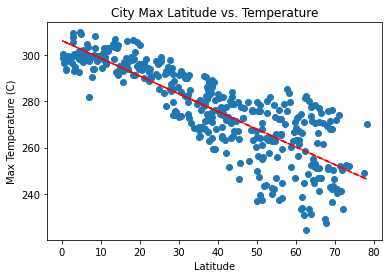

The r-value is:-0.8295427209642192


In [15]:


# Build scatter plot for latitude vs. temperature
x_values = northern_heim_df['Lat']
y_values = northern_heim_df['Max Temp']

# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.plot(x_values, line, "r--", )
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The r-value is:" + str(r))

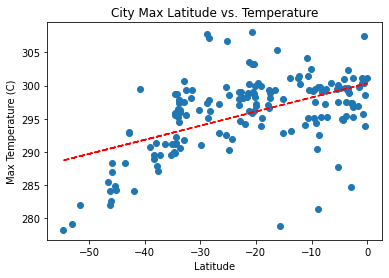

The r-value is:0.522767464293261


In [16]:


# Build scatter plot for latitude vs. temperature
x_values = southern_heim_df['Lat']
y_values = southern_heim_df['Max Temp']

# Linear regression on Southern Hemisphere
slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.plot(x_values, line, "r--", )
# plt.annotate(line_eq,(20,0.5), fontsize=15, color = "red")

# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()

print("The r-value is:" + str(r))

**Discussion about the linear relationship:** 

The linear relationship shows that in general as the city's latitude gets further away from the equator (lat 0) the average temperature correlates to a decrease in temperature.


### Humidity vs. Latitude Linear Regression Plot

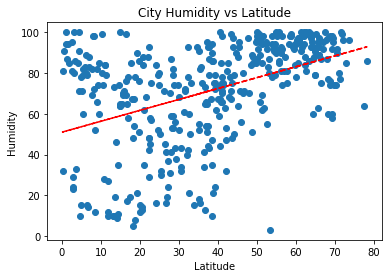

The r-value is:0.43563215705613373


In [21]:
# Build scatter plot for Latitude vs. Humidity
x_values = northern_heim_df['Lat']
y_values = northern_heim_df['Humidity']

# Linear regression
slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Humidity vs Latitude')
plt.plot(x_values, line, "r--", )
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The r-value is:" + str(r))

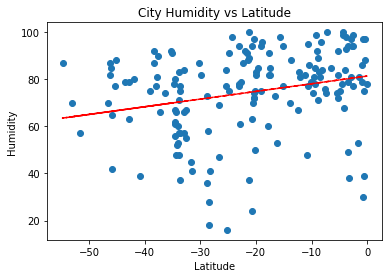

The r-value is:0.25155540515480884


In [20]:
# Southern Hemisphere
# Build scatter plot for Latitude vs. Humidity
x_values = southern_heim_df['Lat']
y_values = southern_heim_df['Humidity']

# Linear regression
slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Humidity vs Latitude')
plt.plot(x_values, line, "r--", )
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The r-value is:" + str(r))

**Discussion about the linear relationship:**
The linear relationship shows that in general as the city's latitude increases the average temperature correlates to an increase in Humidity

### Cloudiness vs. Latitude Linear Regression Plot

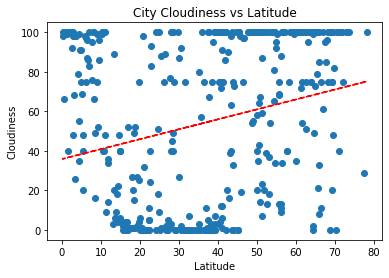

The r-value is:0.2517609666546944


In [22]:
# Northern Hemisphere
# Build scatter plot for Latitude vs. Cloudiness
x_values = northern_heim_df['Lat']
y_values = northern_heim_df['Cloudiness']

# Linear regression
slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Cloudiness vs Latitude')
plt.plot(x_values, line, "r--", )
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The r-value is:" + str(r))

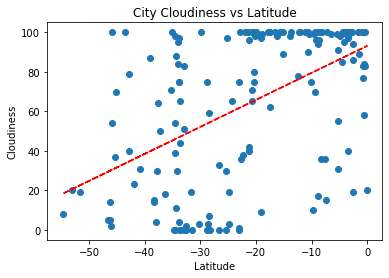

The r-value is:0.502652060195186


In [24]:
# Southern Hemisphere
# Build scatter plot for Latitude vs. Cloudiness
x_values = southern_heim_df['Lat']
y_values = southern_heim_df['Cloudiness']

# Linear regression
slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Cloudiness vs Latitude')
plt.plot(x_values, line, "r--", )
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The r-value is:" + str(r))

**Discussion about the linear relationship:**
The linear relationship between City Cloudiness and Latitude shows that as Latitude increases cloudiness is also likely to rise

### Wind Speed vs. Latitude Linear Regression Plot

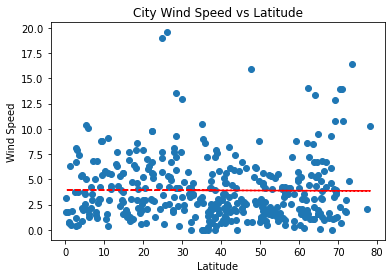

The r-value is:-0.007824997666793626


In [25]:
# Northern Hemisphere

# Build scatter plot for Latitude vs. Wind Speed
x_values = northern_heim_df['Lat']
y_values = northern_heim_df['Wind Speed']

# Linear regression
slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Wind Speed vs Latitude')
plt.plot(x_values, line, "r--", )
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The r-value is:" + str(r))

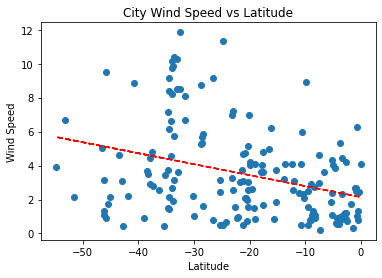

The r-value is:-0.3360095961143176


In [26]:
# Southern Hemisphere

# Build scatter plot for Latitude vs. Wind Speed
x_values = southern_heim_df['Lat']
y_values = southern_heim_df['Wind Speed']

# Linear regression
slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Wind Speed vs Latitude')
plt.plot(x_values, line, "r--", )
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The r-value is:" + str(r))

**Discussion about the linear relationship:**
The linear relationship between City Wind Speed and Latitude shows that as Latitude increases in the southern hemisphere, wind speeds are likely to drop. However in the northern hemisphere, latitude does not seem to correlate to any change in wind speed.